In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import Series
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

df_train=pd.read_csv('./data/train.csv')
df_test=pd.read_csv('./data/test.csv')
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1

df_test.loc[df_test.Fare.isnull(),'Fare']=df_test['Fare'].mean()

df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare']=df_test['Fare'].map(lambda i : np.log(i) if i >0 else 0)


### 3, Feature Engineering
- null값 채우기


 ### 3.1 Fill Null

In [125]:
# 이름의 title(Mr, Miss, Mrs 등) 추출
df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.')

In [127]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [129]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

In [131]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

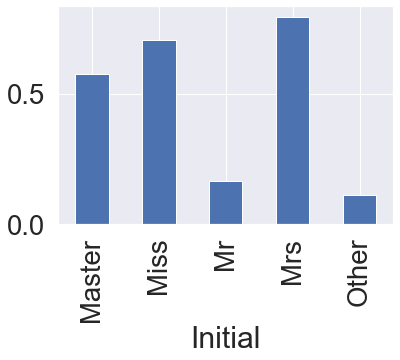

In [132]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [133]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [134]:
#각 Initial Age의 평균을 이용해서 null값 채우기
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age']=33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age']=36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Masger'),'Age']=5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age']=46

In [135]:
print('Embarked has ',sum(df_train['Embarked'].isnull()),' Null values')

Embarked has  2  Null values


In [136]:
df_train['Embarked'].fillna('S',inplace=True)

### 3.1 Change Age(Continuous to categorical)

In [138]:
# 현재 continuous feature인 Age를 몇개의 그룹으로 나누어 categorical로 바꿔준다. (10살 간격으로 나이를 나눔)
df_train['Age_cat']=0
df_train.loc[df_train['Age']<10,'Age_cat']=0
df_train.loc[(10 <= df_train['Age'])&(df_train['Age']<20),'Age_cat']=1
df_train.loc[(20<=df_train['Age'])&(df_train['Age']<30),'Age_cat']=2
df_train.loc[(30<=df_train['Age'])&(df_train['Age']<40),'Age_cat']=3
df_train.loc[(40<=df_train['Age'])&(df_train['Age']<50),'Age_cat']=4
df_train.loc[(50<=df_train['Age'])&(df_train['Age']<60),'Age_cat']=5
df_train.loc[(60<=df_train['Age'])&(df_train['Age']<70),'Age_cat']=6
df_train.loc[70<=df_train['Age'],'Age_cat']=7

df_test['Age_cat']=0
df_test.loc[df_test['Age']<10,'Age_cat']=0
df_test.loc[(10<=df_test['Age'])&(df_test['Age']<20),'Age_cat']=1
df_test.loc[(20<=df_test['Age'])&(df_test['Age']<30),'Age_cat']=2
df_test.loc[(30<=df_test['Age'])&(df_test['Age']<40),'Age_cat']=3
df_test.loc[(40<=df_test['Age'])&(df_test['Age']<50),'Age_cat']=4
df_test.loc[(50<=df_test['Age'])&(df_test['Age']<60),'Age_cat']=5
df_test.loc[(60<=df_test['Age'])&(df_test['Age']<70),'Age_cat']=6
df_test.loc[70<=df_test['Age'],'Age_cat']=7

In [139]:
# 함수를 만들어서 Age의 카테고리화
def category_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7
df_train['Age_cat_2']=df_train['Age'].apply(category_age)

In [140]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 출력 ->', (df_train['Age_cat']==df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 출력 -> True


In [142]:
df_train.drop(['Age','Age_cat_2'],axis=1,inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)